In [1]:
# Standard Library Imports (if any)

# Third-party Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display, HTML
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects

# Local Module Imports
from utils import *
from new_data_handling import DataManager
from plot import *
from new_data_handling.data_processor import *

In [2]:
major = COUNTRIES.MAJOR
offshore = COUNTRIES.OFFSHORE
sample = major + offshore
period = (2001, 2004)
dm = DataManager(
    raw_dir = "../data/raw",
    save_dir = "../data/clean"
)
ds_full = dm.get_dataset("ds")
fed_full = dm.get_dataset("fed")
dm.clean_data("wb")
dm.save_data()

In [3]:
save = None
interpolate = False
major = COUNTRIES.MAJOR
offshore = COUNTRIES.OFFSHORE
sample = major + offshore
period = (2001, 2004)
dm = DataManager(
    raw_dir = "../data/raw",
    save_dir = "../data/clean"
)

In [32]:
# Index returns
period = (2001, 2004)
ds = dm.ds.get_data(period=period, interval="M")
fed = dm.fed.get_data(period=period)
panel_dates = fed.columns
returns_index = compute_index_excess_returns(ds, fed, major)
returns_index = returns_index.stack().rename("returns")

returns_index_cov = returns_index.unstack().T.cov()
returns_index_cov
# # Portfolio returns
# period = (2001, 2004)
# cpis = dm.cpis.get_data(period=period)
# wb = dm.wb.get_data(countries=major, period=period)
# weights = compute_weights(cpis, wb, major, offshore).mean(axis=1).unstack(level="Country")
# returns_portfolio = compute_portfolio_excess_returns(ds, fed, major, weights)

Country,AR,AT,BE,BR,CA,CH,CL,CO,CZ,DE,...,PL,PT,RU,SE,SG,TH,TR,US,VE,ZA
Country,,,,,,,,,,,,,,,,,,,,,
AR,0.013707,0.001105,0.001720,0.006116,0.002188,0.000972,0.003784,0.002423,0.001723,0.002757,...,0.001182,0.001943,0.002843,0.003628,0.001824,0.003413,0.010433,0.001662,0.003098,0.000654
AT,0.001105,0.001875,0.001831,0.002127,0.001068,0.001343,0.000947,0.001492,0.001021,0.001751,...,0.000576,0.001512,0.000486,0.001663,0.001034,0.001296,0.001366,0.000729,0.000639,0.001365
BE,0.001720,0.001831,0.003206,0.004260,0.001653,0.002204,0.002090,0.001905,0.001601,0.003239,...,0.001744,0.002343,0.001307,0.003165,0.001832,0.001887,0.003579,0.001572,0.001347,0.001654
BR,0.006116,0.002127,0.004260,0.013260,0.003885,0.003489,0.004923,0.003064,0.002624,0.006125,...,0.004661,0.003796,0.004449,0.006685,0.003561,0.004887,0.009452,0.003681,0.001560,0.003359
CA,0.002188,0.001068,0.001653,0.003885,0.002474,0.001682,0.002022,0.001424,0.001798,0.002738,...,0.002235,0.001827,0.002425,0.003270,0.001695,0.002456,0.005838,0.001831,0.001778,0.002198
CH,0.000972,0.001343,0.002204,0.003489,0.001682,0.002143,0.001763,0.001411,0.001604,0.002796,...,0.001952,0.001936,0.001778,0.003063,0.001428,0.001945,0.003779,0.001571,0.000895,0.001795
CL,0.003784,0.000947,0.002090,0.004923,0.002022,0.001763,0.003683,0.001548,0.001890,0.003066,...,0.002082,0.001671,0.002627,0.003434,0.001776,0.003171,0.006294,0.001888,0.002172,0.001836
CO,0.002423,0.001492,0.001905,0.003064,0.001424,0.001411,0.001548,0.003780,0.001618,0.002069,...,0.001614,0.001544,0.002286,0.002402,0.001767,0.001907,0.002711,0.001319,0.002123,0.001477
CZ,0.001723,0.001021,0.001601,0.002624,0.001798,0.001604,0.001890,0.001618,0.003765,0.002164,...,0.002684,0.002021,0.002217,0.002802,0.001409,0.002158,0.006180,0.001403,0.001226,0.001783


In [5]:
# World market return
returns_world = compute_index_excess_returns(ds, fed, ["WR"]).to_numpy().flatten()
returns_world_dummies = pd.DataFrame(0.0, index=returns_index.index, columns=major)
for country in major:
    returns_world_dummies.loc[(country, slice(None)), country] = returns_world
returns_world_dummies.columns = ['WRx' + str(col) for col in returns_world_dummies.columns]

In [6]:
# GDP per capita
interpolate=False
period = (2001, 2004) if not interpolate else (2000,2004)
gdp_cap_ppp = dm.gdp.get_data(countries=major, period=period, gdp_type="gdp_cap_ppp")
gdp_cap_ppp = create_monthly_duplicates(gdp_cap_ppp, panel_dates, interpolate=interpolate)
gdp_cap_ppp = gdp_cap_ppp.stack().rename("gdp_cap")

In [7]:
# GDP growth

d_gdp_ppp_lag = pd.DataFrame(index=returns_index.index)

# Lagged yearly
lags = range(1,2)
for lag in lags:
    period = (2000-lag,2004-lag)
    gdp_ppp = dm.gdp.get_data(countries=major, period=period, gdp_type="gdp_ppp")
    d_gdp_ppp = (gdp_ppp.diff(axis=1) / gdp_ppp).iloc[:,1:]
    d_gdp_ppp = create_monthly_duplicates(d_gdp_ppp, panel_dates, interpolate=interpolate)
    d_gdp_ppp_lag[f"d_gdp_{lag}"] = d_gdp_ppp.stack().rename(f"lag{lag}")

# Lagged monthly
# period = (1997,2004)
# n_lags = (2001 - period[0])*12
# columns = dm.ds.get_data(period=period, interval="M").columns[13:]
# d_gdp_ppp_lag = pd.DataFrame(index=returns_index.index)
# gdp_ppp = dm.gdp.get_data(countries=major, period=period, gdp_type="gdp_ppp")
# d_gdp_ppp = (gdp_ppp.diff(axis=1) / gdp_ppp).iloc[:,1:]
# d_gdp_ppp = create_monthly_duplicates(d_gdp_ppp, monthly_columns=columns, interpolate=interpolate)
# d_gdp_ppp
# lags = range(1, 13)
# for lag in lags:
#     d_gdp_ppp_lag[f"d_gdp_{lag}"] = d_gdp_ppp.iloc[:, 36-lag:-lag].T.unstack().to_numpy()
#     d_gdp_ppp.iloc[:, 36-lag:-lag]

In [8]:
# Variances (rolling window, exponential decay)
period = (1996,2004)
ds = dm.ds.get_data(period=period, interval="M")
fed = dm.fed.get_data(period=period)
returns_index_historical = compute_index_excess_returns(ds, fed, major)
variances = pd.DataFrame(index=major, columns=panel_dates)
for i in range(48):
    returns = returns_index_historical.iloc[:,i:i+60]
    means = returns.mean(axis=1)
    returns_demeaned = returns.sub(means, axis=0)
    var_contributions = returns_demeaned**2
    factors = generate_exponential_decay()
    vars = var_contributions.mul(factors).sum(axis=1) / sum(factors)
    variances.iloc[:,i] = vars
variances = variances.stack().rename("variances")

In [9]:
# Collect dependent and independent variables
y = returns_index * 1e2
X = pd.concat([
        returns_world_dummies * 1e2, 
        # gdp_cap_ppp / 1e5,
        d_gdp_ppp_lag * 1e2,
        variances * 1e2,
],
    axis=1)
# X = pd.concat([
#         returns_world_dummies, 
#         gdp_cap_ppp,
#         gdp_ppp_lag,
#         variances,
# ],
#     axis=1)
X = sm.add_constant(X)

In [10]:
# Do statistics
from linearmodels.panel import PanelOLS, PooledOLS

model_panel = PanelOLS(y, X, entity_effects=True).fit(cov_type="kernel", kernel="bartlett", bandwidth=4)
model_pooled = PooledOLS(y,X).fit(cov_type="kernel", kernel="bartlett", bandwidth=4)

model_panel.summary
model_pooled.summary

comparison = pd.DataFrame([model_pooled.params, model_panel.params], index=["pooled", "panel"])
date = model_panel.estimated_effects.index.get_level_values(1)[0]

effects = model_panel.estimated_effects.loc[(slice(None), date),:].droplevel(1)

if save is not None:
    save_dir = f"./output/exp3/results/"
    os.makedirs(save_dir, exist_ok=True)
    print(save_dir)
    with open(os.path.join(save_dir, f"{save}.txt"), "w") as f:
        f.write(model_panel.summary.as_text())
model_panel.summary

Dep. Variable:,returns,R-squared:,0.4443
Estimator:,PanelOLS,R-squared (Between):,-0.2583
No. Observations:,1824,R-squared (Within):,0.4443
Date:,"Sat, Apr 19 2025",R-squared (Overall):,0.4343
Time:,16:22:53,Log-likelihood,-5780.7
Cov. Estimator:,Driscoll-Kraay,,
,,F-statistic:,34.897
Entities:,38,P-value,0.0000
Avg Obs:,48.000,Distribution:,"F(40,1746)"
Min Obs:,48.000,,
Max Obs:,48.000,F-statistic (robust):,2.876e+05


In [11]:
# Expected world return
period = (1991,2004)
ds = dm.ds.get_data(period=period, interval="M")
fed = dm.fed.get_data(period=period)
returns_world = compute_index_excess_returns(ds, fed, ["WR"])
returns_world_expectation = np.zeros(48)
for i in range(48):
    returns = returns_world.iloc[:,i:i+120]
    mean = returns.mean(axis=1).iloc[0]
    returns_world_expectation[i] = mean

In [18]:
params_for_estimation = model_panel.params.copy()
X_for_estimation = X.copy()
params_for_estimation
for country in major:
    world_return_header = "WRx" + country
    X_for_estimation.loc[(country, slice(None)), world_return_header] = returns_world_expectation
fitted_returns = (X_for_estimation * params_for_estimation)
fitted_returns = fitted_returns.sum(axis=1).unstack()
# (fitted_returns < 0).sum(axis=1)

In [ ]:
# Covariances
returns = returns_index.unstack()
returns_demeaned = returns.sub(returns.mean(axis=1), axis=0)
stds = variances.map(lambda x: np.sqrt(x)).unstack()
standardised_returns = returns_demeaned / stds / 100
corrs = standardised_returns.T.corr()
covs = pd.DataFrame(index=major, columns=pd.MultiIndex.from_product([stds.columns, major]))
for month in stds.columns:
    covs[month] = corrs.mul(stds[month],axis=1).mul(stds[month],axis=0)

In [20]:
# Covariance risks
period = (2001, 2004)
cpis = dm.cpis.get_data(period=period)
wb = dm.wb.get_data(countries=major, period=period)
weights_per_year = compute_weights(cpis, wb, major, offshore)
weights = weights_per_year.mean(axis=1).unstack(level="Country")
weights["MX"] = weights_per_year.loc["MX"][[2003,2004]].mean(axis=1)
cov_risks = pd.DataFrame(index=covs.index, columns=stds.columns)
for month in stds.columns:
    cov_risks[month] = np.diagonal(covs[month] @ weights)

In [79]:
# eta * f
eta_f = (fitted_returns /100) / cov_risks
cov_risks

,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,...,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31
AR,0.004691,0.008024,0.008448,0.007660,0.006957,0.006254,0.006018,0.007840,0.007087,0.009049,...,0.008789,0.007985,0.008686,0.009528,0.008565,0.007738,0.006977,0.008360,0.007670,0.007013
AT,0.001943,0.001775,0.001890,0.001953,0.001851,0.001891,0.001724,0.001810,0.001691,0.001991,...,0.001931,0.001753,0.001612,0.001411,0.001324,0.001214,0.001094,0.001049,0.001047,0.001630
BE,0.002230,0.002070,0.002008,0.002557,0.002370,0.002414,0.002241,0.002155,0.001990,0.002470,...,0.003294,0.003056,0.002753,0.002463,0.002227,0.002041,0.001979,0.002101,0.002113,0.002266
BR,0.013817,0.014005,0.013760,0.014188,0.012923,0.011874,0.010758,0.010311,0.010200,0.012059,...,0.010057,0.009288,0.009941,0.009252,0.008552,0.008356,0.007589,0.007109,0.006403,0.006810
CA,0.003829,0.003488,0.004737,0.004940,0.004783,0.004312,0.004004,0.003667,0.003516,0.003964,...,0.001594,0.001464,0.001981,0.001809,0.001692,0.001533,0.001384,0.001667,0.001744,0.001723
CH,0.002165,0.002062,0.002389,0.003088,0.002868,0.002644,0.002516,0.002308,0.002096,0.002430,...,0.002133,0.001990,0.001803,0.001609,0.001448,0.001459,0.001320,0.001252,0.001173,0.001474
CL,0.002170,0.002587,0.002699,0.002511,0.002395,0.002492,0.002464,0.002419,0.002363,0.004046,...,0.004149,0.004356,0.004137,0.003907,0.003701,0.003365,0.003238,0.002988,0.002686,0.002696
CO,0.004730,0.005316,0.004991,0.005093,0.004641,0.005562,0.005033,0.004559,0.004133,0.003952,...,0.005284,0.005175,0.004879,0.006096,0.005389,0.004876,0.004454,0.004389,0.004085,0.006482
CZ,0.011672,0.010709,0.010633,0.010431,0.009392,0.008486,0.007670,0.007021,0.006326,0.006035,...,0.003991,0.003648,0.003479,0.003244,0.002951,0.002744,0.002523,0.003039,0.002927,0.004536
DE,0.003146,0.002890,0.003328,0.003852,0.003838,0.003863,0.003526,0.003189,0.003196,0.004947,...,0.004350,0.004075,0.003717,0.003322,0.003043,0.002919,0.002654,0.002549,0.002446,0.002808


In [33]:
# weights * eta_f
terms = {}
for country_i in major:
    weights_i = weights.loc[:,[country_i]]
    weights_i.columns.name = None
    weights_i.index.name = None
    terms[country_i] = returns_index_cov @ weights_i @ eta_f.loc[[country_i], :]

<Axes: >

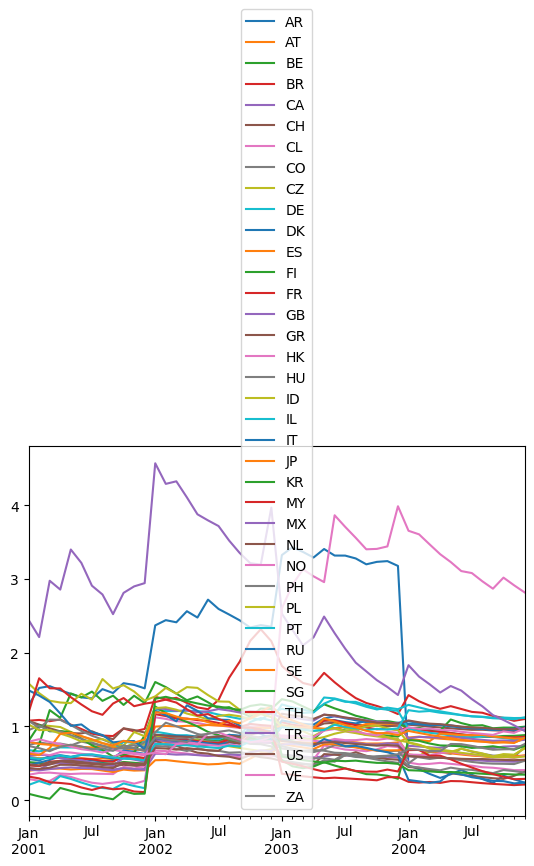

In [73]:
month = "2004-01-31"
countries = ["BR", "MX"]
eta_f_ = eta_f.loc[countries, month]
e_c = covs[month] @ weights[countries].mul(eta_f_)
e_c_diff = e_c["BR"] - e_c["MX"]
e_c

country_i = "BR"
country_j = "MX"
eta_f_i = eta_f.loc[country_i, month]
eta_f_j = eta_f.loc[country_j, month]
e_c_i = covs[month] @ (eta_f_i*weights[country_i])
e_c_j = covs[month] @ (eta_f_j*weights[country_j])
e_c_i - e_c_j
fitted_returns.T.plot()


<Axes: >

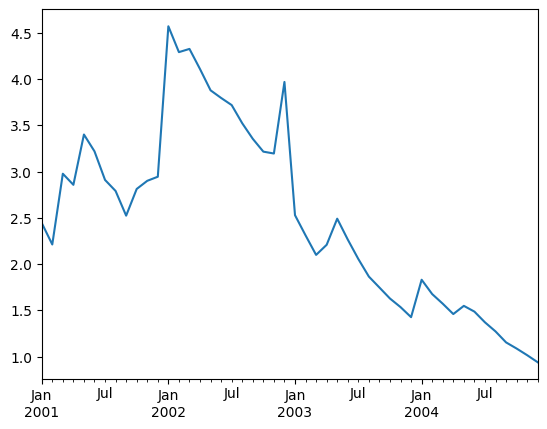

In [77]:
fitted_returns.T["TR"].plot()

In [34]:
costs = pd.DataFrame(0.0, index=covs.index, columns=covs.columns)
for country_i in major:
    for country_j in major:        
        cost_diff = terms[country_i] - terms[country_j]
        for month in stds.columns:
            costs.loc[country_i, (month, country_j)] = cost_diff.loc[country_i, month]
            costs.loc[country_j, (month, country_i)] = - cost_diff.loc[country_j, month]
    print(country_i, end=" ")

AR AT BE BR CA CH CL CO CZ DE DK ES FI FR GB GR HK HU ID IL IT JP KR MY MX NL NO PH PL PT RU SE SG TH TR US VE ZA 

<Axes: >

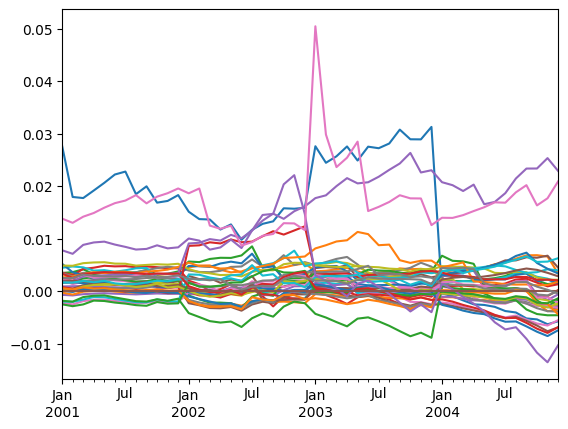

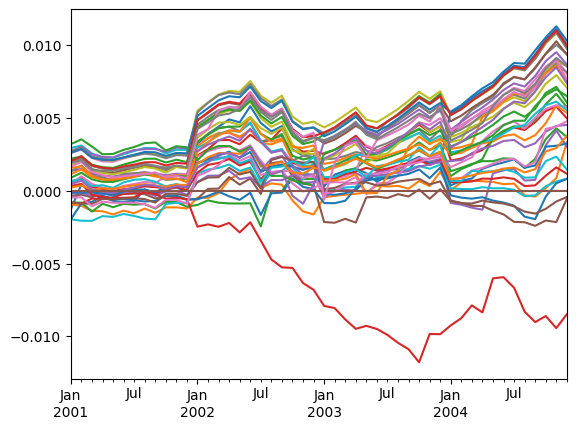

In [89]:
data_outward = costs.loc[slice(None), (slice(None), "US")].T.droplevel(level=1)
data_inward = costs.loc["US"].unstack()
data_outward.plot(legend=False)
data_inward.plot(legend=False)

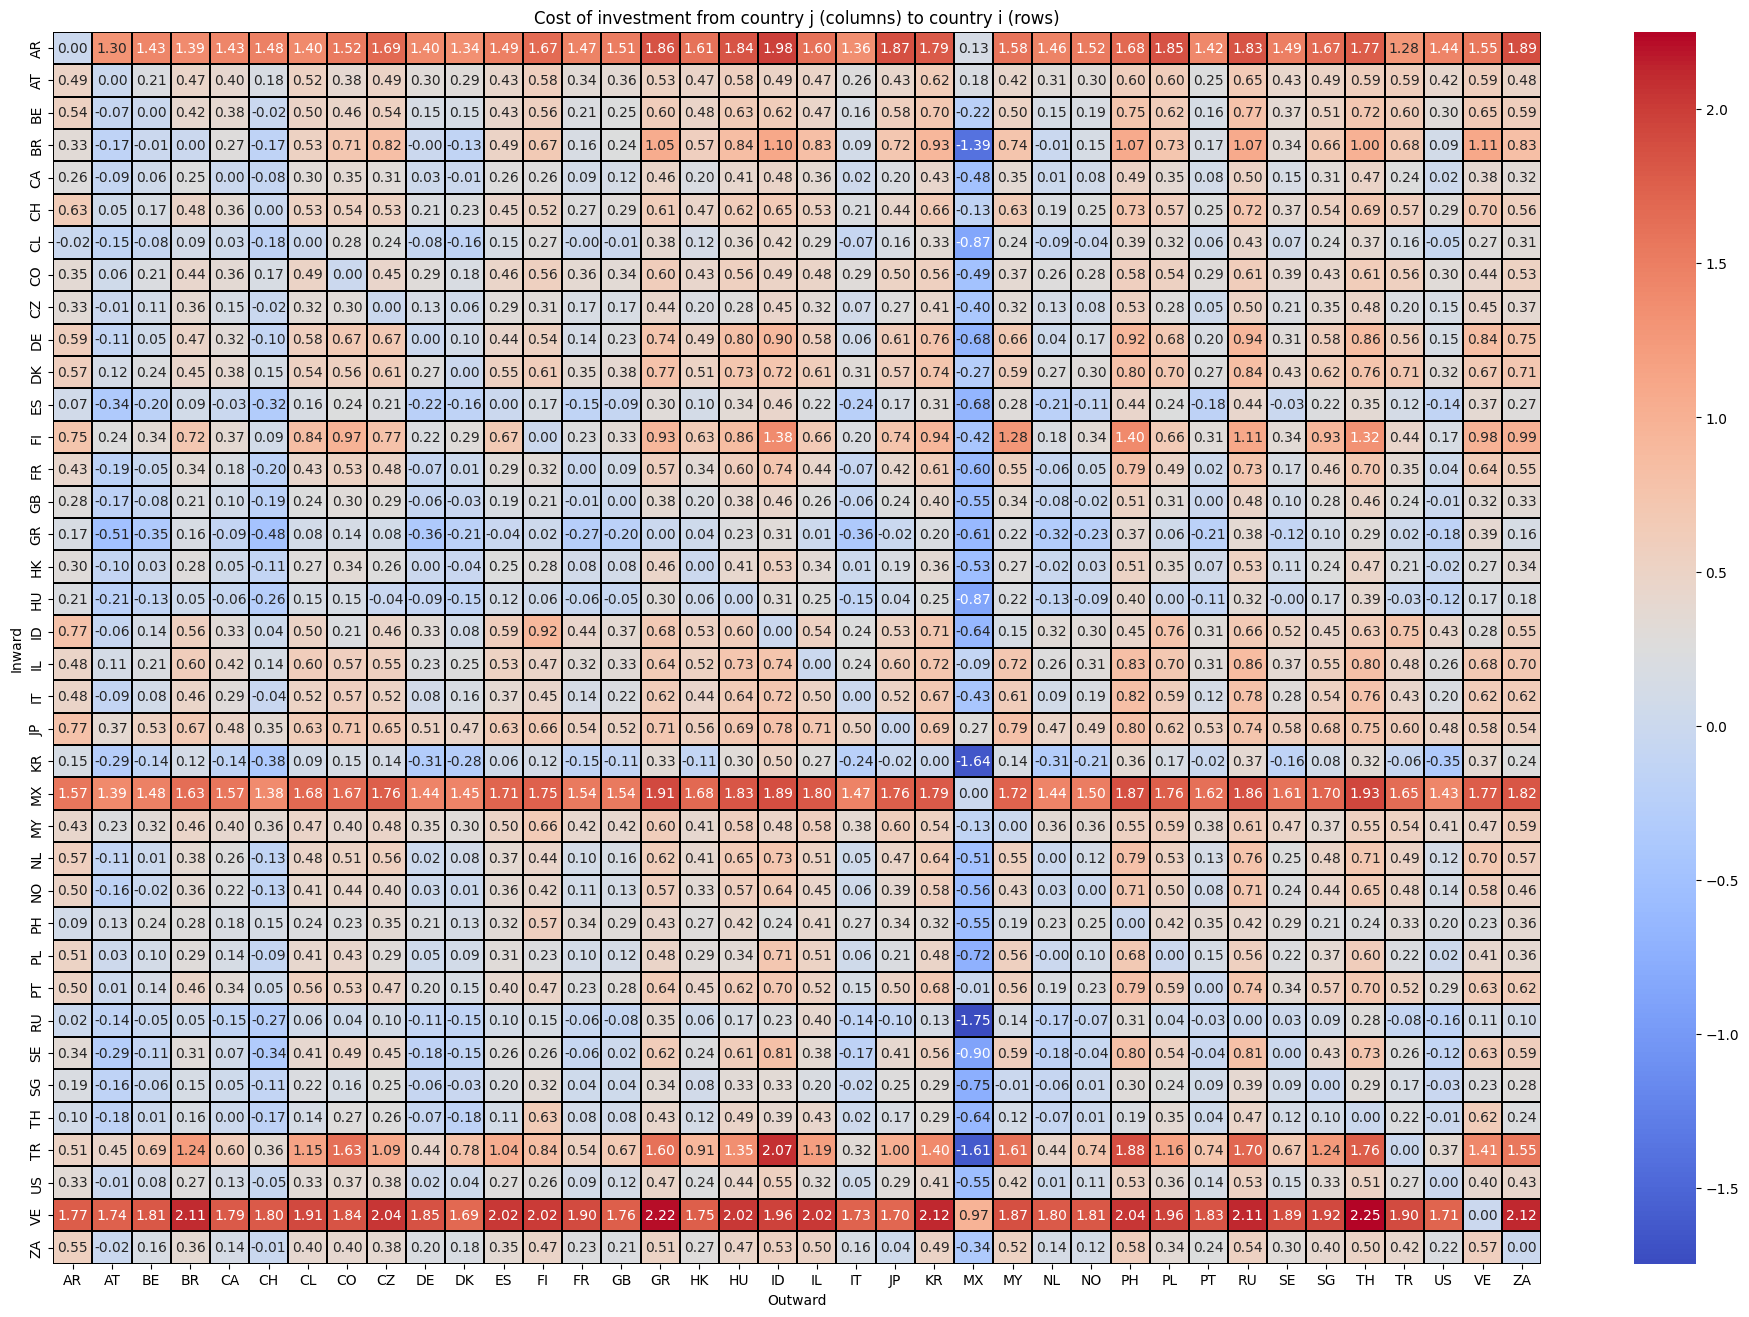

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

costs_mean = costs.T.groupby(level=1).mean().T
costs_mean = costs_mean.sort_index(axis=0, inplace=False).sort_index(axis=1, inplace=False) * 100
# Heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(costs_mean, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.1, linecolor='black')
plt.title('Cost of investment from country j (columns) to country i (rows)')
plt.xlabel("Outward")
plt.ylabel("Inward")
plt.show()

In [92]:
mean_inward_cost = costs_mean.mean(axis=1)
mean_outward_cost = costs_mean.mean(axis=0)

<Axes: >

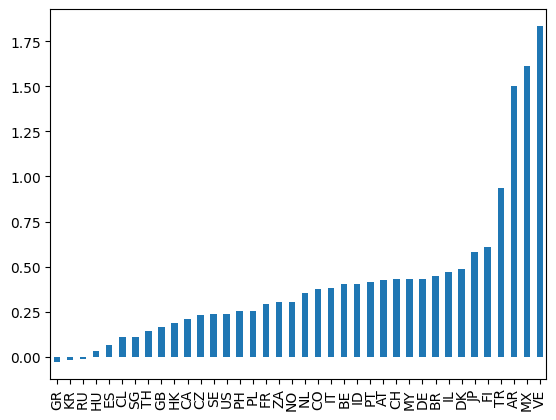

In [100]:
mean_inward_cost.sort_values().plot(kind="bar")

<Axes: >

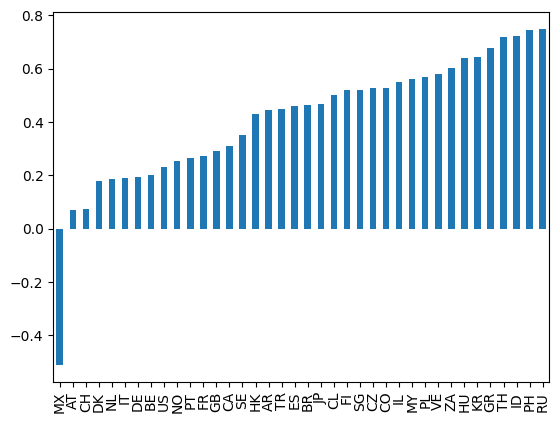

In [101]:
mean_outward_cost.sort_values().plot(kind="bar")